#                  Object Oriented Project Hands-On

## Simulación: Fila en un Banco

El objetivo de esta sesión es realizar una simulación de atención en línea de cajas de un Banco usando para ello un diseño orientado a objetos.

El diseño de este simulador cuenta con las siguientes clases: `Fila`, `FilaPreferencial`, `FilaGeneral` y `Cliente`.

El Banco decidió como política dividir la atención en dos filas correspondientes a aquellos clientes preferenciales del Banco y otra para aquellos clientes generales.

Una de las ventajas de pertenecer a la cartera de clientes preferenciales está relacionada con el tiempo de espera. Si los clientes preferenciales esperan demasiado tiempo (o sea, si la fila preferencial es demasiado larga) es posible dividir en dos la fila y abrir una nueva caja de atención.

Los clientes pueden acceder a un upgrade de general al preferencial. 

El diagrama de clases se puede ver a continuación: 

![title](clasesfila.png)

## Tareas

1. Completar la implementación de los métodos faltantes en las diferentes clases.
2. Completar el módulo main que realice la simulación de atención a medida que llegan los clientes.
3. Crear un método que muestre la fila de clientes de cada tipo.
4. Realizar una visualización de la simulación.

In [2]:
# Las clases se encuentran en el archivo main.py
from main import Fila
from main import FilaPreferencial
from main import FilaGeneral
from main import cliente

In [3]:
import numpy as np
from random import randint,uniform

In [41]:
t_cierre = 240 # Tiempo en el que estan abiertas las puertas del banco (en minutos)

nmax_ingresan = 4   # Máximo numero de clientes que ingresan al banco x minuto
#nmax_atendidos_G = 4 # Máximo numero de clientes atendidos x minuto
#nmax_atendidos_P = 1 # Máximo numero de clientes atendidos x minuto

r_preferencial = 0.25 # El r_preferncialx100% de clientes es Preferencial 

t_atencion_G = 1.0 # Tiempo (en minutos) de atención a clientes Generales 
t_atencion_P = 3.50 # Tiempo (en minutos) de atención a clientes Preferenciales

inv_t_atencion_G = 1.0 / t_atencion_G
inv_t_atencion_P = 1.0 / t_atencion_P

In [42]:
enfila_G = []  # Lista de clientes no preferenciales en la fila
enfila_P = []  # Lista de clientes    preferenciales en la fila

In [43]:
#Banco Abierto (Entran Clientes y son Atendidos)

# Creo Una fila Preferencial
Fila_P = FilaPreferencial()

# Creo una fila General (Unica)
Fila_G = FilaGeneral()

t=1  # Primer minuto en el banco
while t <= t_cierre:
    # Ingreso de Clientes al Banco por minuto
    n_clientes = randint(1,nmax_ingresan)              #n_clientes = 12 
    # Creación, Categorización y Asignación de Clientes a la fila que Corresponde
    for i in range(n_clientes):
        dni = randint(10000000,50000000)
        o_cliente = cliente(dni)
        
        if uniform(0,1) < r_preferencial:
            o_cliente.modificarcategoria("Preferencial")
            Fila_P.insertar(o_cliente)
        else:
            o_cliente.modificarcategoria("No Preferencial")
            Fila_G.insertar(o_cliente) 
    
    
    # Atención de Clientes en la fila General
    
    if uniform(0,1) < inv_t_atencion_G: 
        if Fila_G.enfila > 0: # Si hay clientes en la fila
            Fila_G.atender()

    
    # Atención de Clientes en la fila Preferencial
    if uniform(0,1) < inv_t_atencion_P:
        if Fila_P.enfila > 0: 
            Fila_P.atender()
            
            
    # Recuento de clientes en cada fila
    enfila_G.append(Fila_G.enfila)
    enfila_P.append(Fila_P.enfila)

    #Paso un minuto
    t += 1 


print(Fila_P.enfila)
print(Fila_G.enfila)


92
190


In [44]:
# Banco Cierra las Puertas (Dejan de entrar clientes, pero se sigue atendiendo, hasta que no quede ninguno)

while Fila_P.enfila > 0 or Fila_G.enfila > 0:
     # Atención de Clientes en la fila General
    
    if uniform(0,1) < inv_t_atencion_G:
        if Fila_G.enfila > 0: 
            Fila_G.atender()

    
    # Atención de Clientes en la fila Preferencial
    if uniform(0,1) < inv_t_atencion_P:
        if Fila_P.enfila > 0: 
            Fila_P.atender()
            
    # Recuento de clientes en cada fila
    enfila_G.append(Fila_G.enfila)
    enfila_P.append(Fila_P.enfila)        
            
            
    #Paso un minuto
    t += 1 


print(Fila_P.enfila)
print(Fila_G.enfila)




0
0


In [45]:
import matplotlib.pyplot as plt 

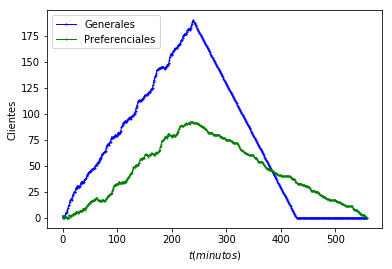

In [46]:
CG = np.asarray(enfila_G)
CP = np.asarray(enfila_P)

plt.plot(CG,"bo-", linewidth=1, markersize=1 , label="Generales" );
plt.plot(CP,"gd-", linewidth=1, markersize=1 , label="Preferenciales" );
plt.xlabel("$t(minutos)$") # LaTeX Code 
plt.ylabel("Clientes")   # 
plt.legend(loc="upper left") # 
plt.savefig("myplot.pdf")